In [592]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import time
import datetime
from queue import Queue
from collections import deque
from scipy.stats import norm

%matplotlib inline

# Requirements

The 4 Coronavirus Datasets
- https://www.kaggle.com/sudalairajkumar/datasets
- https://www.kaggle.com/kimjihoo/datasets

In [570]:
base_dir = '/Users/morgan/Code/Data/Covid19'
general_path = os.path.join(base_dir,'novel-corona-virus-2019-dataset')
korea_path = os.path.join(base_dir,'coronavirusdataset')
USA_path = os.path.join(base_dir,'covid19-in-usa')
Italy_path = os.path.join(base_dir,'covid19-in-italy')

In [571]:
korea_timeline = os.path.join(korea_path,'Time.csv')
general_timeline = os.path.join(general_path,'time_series_covid_19_confirmed.csv')
USA_1 = os.path.join(USA_path,'us_covid19_daily.csv')
USA_2 = os.path.join(USA_path,'us_states_covid19_daily.csv')
italy_file = os.path.join(Italy_path,'covid19_italy_region.csv')
italy_file2 = os.path.join(Italy_path,'covid19_italy_province.csv')

In [572]:
korea_df = pd.read_csv(korea_timeline)
general_df = pd.read_csv(general_timeline)
USA_1df = pd.read_csv(USA_1)
USA_2df = pd.read_csv(USA_2)
italy_df = pd.read_csv(italy_file)
italy_df2 = pd.read_csv(italy_file2)

In [536]:
italy_df.tail()

,SNo,Date,Country,RegionCode,RegionName,Latitude,Longitude,HospitalizedPatients,IntensiveCarePatients,TotalHospitalizedPatients,HomeConfinement,CurrentPositiveCases,NewPositiveCases,Recovered,Deaths,TotalPositiveCases,TestsPerformed
478,478,2020-03-17 17:00:00,ITA,9,Toscana,43.769231,11.255889,329,143,472,552,1024,183,12,17,1053,6727
479,479,2020-03-17 17:00:00,ITA,4,P.A. Trento,46.068935,11.121231,107,22,129,239,368,1,10,7,385,1727
480,480,2020-03-17 17:00:00,ITA,10,Umbria,43.106758,12.388247,36,21,57,135,192,33,4,1,197,1323
481,481,2020-03-17 17:00:00,ITA,2,Valle d'Aosta,45.737503,7.320149,35,6,41,93,134,31,0,2,136,398
482,482,2020-03-17 17:00:00,ITA,5,Veneto,45.434905,12.338452,548,171,719,1769,2488,214,136,80,2704,35478


# Hypothesis

- Check doubling sequence with R not based on initial data. See how that matches up with reality
- Perhaps as % of population
- Match up increase rates with quarantine measures?

Essentially what it takes is lockdown. So then the question is, when will the USA go into lockdown completely?

- What metrics do other countries use to determine lockdowns? % of population, number of free hospital beds vs hospitalized covid patients, etc.
- When will the US reach those metrics?
- How effective is the soft lockdown? and how if so is it enough as to avoid lockdown?

Italy may be the best comparison
- 60M people
- Quarantined on March 9 (with additional restrictions added later)

It doesn't matter in terms of the exponential whether you consider each state separately or all together. Except in terms of very specific things like distribution of age, or other slight factors. It does however matter a lot in terms of the hospital beds. The hospital beds are being stressed locally. So if we model the exponential globally, but account for the hospital beds and % split of infected locally, that should be a pretty good indication.

Hospital Beds in the USA https://www.kff.org/other/state-indicator/beds-by-ownership/?currentTimeframe=0&sortModel=%7B%22colId%22:%22Location%22,%22sort%22:%22asc%22%7D

## New Goal

Modeling the S curve as the R0 decreases due to preventative measures and social distancing. With this view, it appears that any of the worst case scenarios are of 0% and its very unlikely to even reach a million cases initially. If the curve is sufficently flattened, it may become another one of the flu strains that roams the world. But we won't be looking at the severe strain that some had projected.

## USA

from https://www.nytimes.com/interactive/2020/03/17/upshot/hospital-bed-shortages-coronavirus.html

- Number of Hospitals 6,146
- Number of admissions 36,353,946
- total hospital beds 738,000 
- total unoccupied beds 265,000
- total ICU beds 85,000
- total unoccupied ICU beds 32,000 - 45k

## Italy

- Number of hospital beds per 1k people 3.2
- Number of people 60.48M
- Number of hospital beds 18.9k
- 12.5 critical care beds per 100k people https://www.ft.com/content/34f25036-62f4-11ea-a6cd-df28cc3c6a68
- 7560 ICU beds

#### Lockdown stats

- Declared lockdown march 9 2020
- 9172 cases
- 1797 daily cases 
- 7985 currently infected 
- 463 deaths 
- 97 daily deaths 
- 638 or 8% Serious or critical

USA has 5.4x the population of Italy. If we scale these numbers to USA

- 45860 cases
- 9703.8 daily cases 
- 43119 currently infected
- 2500.2 deaths
- 523.8 daily deaths
- 3445.2 Serious or critical

USA currently

- 9259 total cases
- 9003 active cases
- 2848 daily cases
- 155 total deaths
- 41 daily deaths
- 108 recovered

# USA State specifics

### New York

- ICU Beds 3k
- 80% are filled
- Ordering an additional 18,600 - 37,200 beds
- has 53k normal beds, wants 110k

### Washington

- 7.54M
- 1.7 per 1000k people
- 12.818k hospital beds

### California

- Pop 39.56M
- 7274 ICU beds
- 58% occupied
- 4219 Unoccupied ICU beds
- 1.8 per 1000k people
- 71.208k hospital beds

## C19 Characteristics

- R0 of 2.5
- Average of 5 days before symptoms
- Hospital recovery time of 2.5 weeks
- Average number of hospitalizations?

In [681]:
def sigmoid(x):
    return 1 / 1 + np.exp(-x)

In [698]:
s = nn.Sigmoid()
xax = np.arange(20) - 10
inputs = torch.arange(20).float() - 10
xaxis = s(inputs.reshape(1,20))

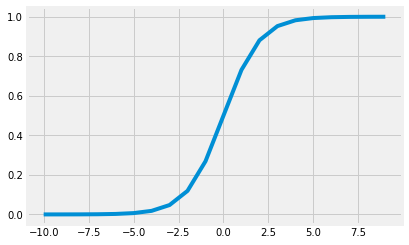

In [699]:
plt.plot(xax,xaxis.view(-1).numpy())

## Looking at infection cases

In [730]:
def gen_infection_scurve(params):
    population,R0,asymptomatic_period,hospitalization_rate,inflection_point,R0_reduction,base_R0 = params.values()
    day = 0
    total_infections = population
    current_infections = population
    hospitalized_patients = deque(maxlen=10)
    while 1:
        if day < inflection_point*asymptomatic_period:
            current_infections = R0 * current_infections
            total_infections += current_infections
            day += asymptomatic_period
            hospitalized_patients.append(current_infections * hospitalization_rate)
    #         print(f'hospitalized_patients {sum(hospitalized_patients)}')
        else:
            R0 -= (R0 - base_R0) / 2
            R0 = max(R0,base_R0)
            current_infections = R0 * current_infections
            total_infections += current_infections
            day += asymptomatic_period
            hospitalized_patients.append(current_infections * hospitalization_rate)
        print(f'Day {day}, Current_infections: {current_infections:.0f}, total_infections: {total_infections:.0f}, Hospitalized_patients {sum(hospitalized_patients):.2f}, R0 {R0:.2f}')
        yield (day,current_infections,total_infections,sum(hospitalized_patients),R0)
    

In [752]:
population = 3
R0 = 2.3
asymptomatic_period = 5
hospitalization_rate = 0.05
inflection_point = 10 # of cycles since to Jan 24 to March 16
R0_reduction = 0.4
base_R0 = 0.7
params = {'population':population,
         'R0':R0,
         'asymptomatic_period':asymptomatic_period,
         'hospitalization_rate':hospitalization_rate,
         'inflection_point':inflection_point,
         'R0_reduction':R0_reduction,
         'base_R0':base_R0
         }
curveGenerator = gen_infection_scurve(params)

In [753]:
scurve_data = []
for _ in range(25):
    scurve_data.append(next(curveGenerator))

Day 5, Current_infections: 7, total_infections: 10, Hospitalized_patients 0.34, R0 2.30
Day 10, Current_infections: 16, total_infections: 26, Hospitalized_patients 1.14, R0 2.30
Day 15, Current_infections: 37, total_infections: 62, Hospitalized_patients 2.96, R0 2.30
Day 20, Current_infections: 84, total_infections: 146, Hospitalized_patients 7.16, R0 2.30
Day 25, Current_infections: 193, total_infections: 339, Hospitalized_patients 16.82, R0 2.30
Day 30, Current_infections: 444, total_infections: 783, Hospitalized_patients 39.02, R0 2.30
Day 35, Current_infections: 1021, total_infections: 1805, Hospitalized_patients 90.09, R0 2.30
Day 40, Current_infections: 2349, total_infections: 4154, Hospitalized_patients 207.56, R0 2.30
Day 45, Current_infections: 5403, total_infections: 9558, Hospitalized_patients 477.73, R0 2.30
Day 50, Current_infections: 12428, total_infections: 21986, Hospitalized_patients 1099.13, R0 2.30
Day 55, Current_infections: 18642, total_infections: 40628, Hospitali

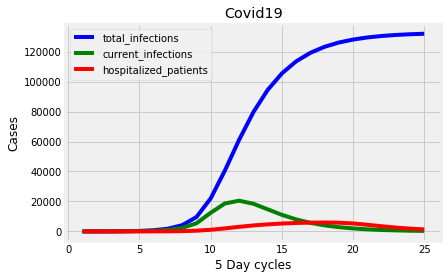

In [751]:
days,current_infections,total_infections,hospitalized_patients,R0s = [],[],[],[],[]
for point in scurve_data:
    day,current_infection,total_infection,hospitalized_patient,R0 = point
    days.append(day)
    current_infections.append(current_infection)
    total_infections.append(total_infection)
    hospitalized_patients.append(hospitalized_patient)
    R0s.append(R0)
    
values = [total_infections,current_infections,hospitalized_patients,R0s,days]
labels = ['total_infections','current_infections','hospitalized_patients','R0s','days']
colors = ['b','g','r','c','m','y','lightblue','lightgreen','gray','teal']
for i,x in enumerate(values[:-2]):
    epochs = range(1,len(x)+1)
    plt.plot(epochs,x,colors[i],label=f"{labels[i]}")
    plt.title('Covid19')
    plt.xlabel('5 Day cycles')
    plt.ylabel('Cases')
    plt.legend()
plt.show()

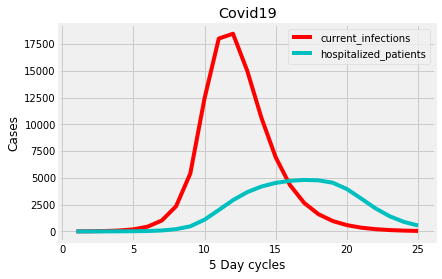

In [745]:
for i,x in enumerate(values[2:-1],2):
    epochs = range(1,len(x)+1)
    plt.plot(epochs,x,colors[i],label=f"{labels[i]}")
    plt.title('Covid19')
    plt.xlabel('5 Day cycles')
    plt.ylabel('Cases')
    plt.legend()
plt.show()

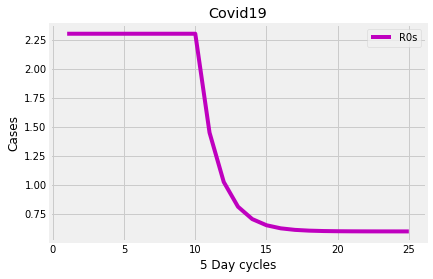

In [743]:
for i,x in enumerate(values[4:],4):
    epochs = range(1,len(x)+1)
    plt.plot(epochs,x,colors[i],label=f"{labels[i]}")
    plt.title('Covid19')
    plt.xlabel('5 Day cycles')
    plt.ylabel('Cases')
    plt.legend()
plt.show()

In [626]:
def gen_infections(population,R0,asymptomatic_period,hospitalization_rate):
    day = 0
    total_infections = population
    current_infections = population
    hospitalized_patients = deque(maxlen=10)
    while 1:
        current_infections = R0 * current_infections
        total_infections += current_infections
        day += asymptomatic_period
        hospitalized_patients.append(current_infections * hospitalization_rate)
#         print(f'hospitalized_patients {sum(hospitalized_patients)}')
        print(f'Day {day}, Current_infections: {current_infections:.0f}, total_infections: {total_infections:.0f}, Hospitalized_patients {sum(hospitalized_patients):.2f}')
        yield total_infections
    

In [662]:
population = 3
R0 = 2.3
asymptomatic_period = 5
hospitalization_rate = 0.05
generator = gen_infections(population,Rn,asymptomatic_period,hospitalization_rate)

In [663]:
for i in range(1,17):
    next(generator)
#     print(f'Infected population {next(generator)}, Day {i*5}')

Day 5, Current_infections: 7, total_infections: 10, Hospitalized_patients 0.34
Day 10, Current_infections: 16, total_infections: 26, Hospitalized_patients 1.14
Day 15, Current_infections: 37, total_infections: 62, Hospitalized_patients 2.96
Day 20, Current_infections: 84, total_infections: 146, Hospitalized_patients 7.16
Day 25, Current_infections: 193, total_infections: 339, Hospitalized_patients 16.82
Day 30, Current_infections: 444, total_infections: 783, Hospitalized_patients 39.02
Day 35, Current_infections: 1021, total_infections: 1805, Hospitalized_patients 90.09
Day 40, Current_infections: 2349, total_infections: 4154, Hospitalized_patients 207.56
Day 45, Current_infections: 5403, total_infections: 9558, Hospitalized_patients 477.73
Day 50, Current_infections: 12428, total_infections: 21986, Hospitalized_patients 1099.13
Day 55, Current_infections: 28584, total_infections: 50570, Hospitalized_patients 2528.00
Day 60, Current_infections: 65744, total_infections: 116314, Hospital

## Graphs with different initial populations

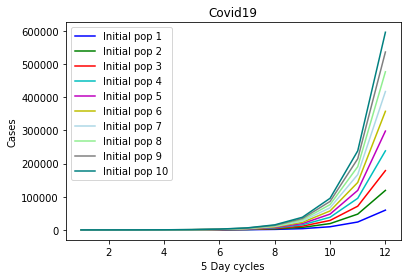

In [380]:
alternates = []
data_points = {i:[] for i in range(10)}
for i in range(1,11):
    alternates.append(gen_infections(i,2.5,5))
for i,gen in enumerate(alternates):
    for _ in range(1,13):
        data_points[i].append(next(gen))
    

colors = ['b','g','r','c','m','y','lightblue','lightgreen','gray','teal']
xs = data_points.values()
for i,x in enumerate(xs):
    epochs = range(1,len(x)+1)
    plt.plot(epochs,x,colors[i],label=f"Initial pop {i+1}")
    plt.title('Covid19')
    plt.xlabel('5 Day cycles')
    plt.ylabel('Cases')
    plt.legend()
plt.show()

## Different R0 values with pop 1

In [386]:
R0s = np.linspace(2,3,11)

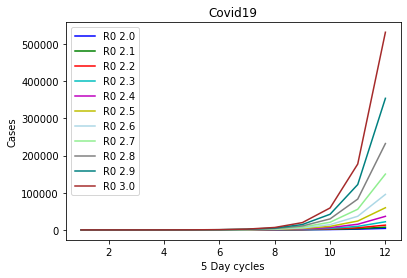

In [391]:
alternates = []
data_points = {i:[] for i in range(11)}
for R0 in R0s:
    alternates.append(gen_infections(1,R0,5))
for i,gen in enumerate(alternates):
    for _ in range(1,13):
        data_points[i].append(next(gen))
    

colors = ['b','g','r','c','m','y','lightblue','lightgreen','gray','teal','brown']
xs = data_points.values()
for i,x in enumerate(xs):
    epochs = range(1,len(x)+1)
    plt.plot(epochs,x,colors[i],label=f"R0 {R0s[i]}")
    plt.title('Covid19')
    plt.xlabel('5 Day cycles')
    plt.ylabel('Cases')
    plt.legend()
plt.show()

# WHO projected R0

Max 4096, 59604.644775390625


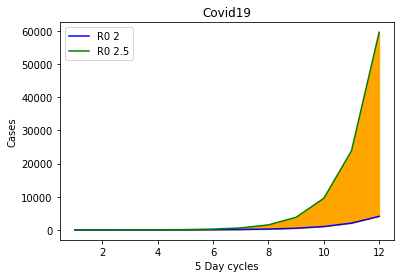

In [413]:
WHO_R0s = [2,2.5]

alternates = []
data_points = {i:[] for i in range(2)}
for R0 in WHO_R0s:
    alternates.append(gen_infections(1,R0,5))
for i,gen in enumerate(alternates):
    for _ in range(1,13):
        data_points[i].append(next(gen))

print(f'Max {np.max(data_points[0])}, {np.max(data_points[1])}')

colors = ['b','g','r','c','m','y','lightblue','lightgreen','gray','teal','brown']
epochs = range(1,len(data_points[0])+1)
plt.plot(epochs,data_points[0],colors[0],label=f"R0 {WHO_R0s[0]}")
plt.plot(epochs,data_points[1],colors[1],label=f"R0 {WHO_R0s[1]}")
plt.fill_between(epochs, data_points[0], data_points[1],color='orange')
plt.title('Covid19')
plt.xlabel('5 Day cycles')
plt.ylabel('Cases')
# plt.yscale("log")
plt.legend()
plt.show()

# Utils

In [142]:
def plot_totals(cases,deaths=None):
    epochs = range(1,len(cases)+1)
    plt.plot(epochs,cases,'g',label="Confirmed Cases")
    if deaths:
        plt.plot(epochs,deaths,'m',label="Deaths")
    plt.title('Covid19')
    plt.xlabel('Days')
    plt.ylabel('Cases')
    plt.legend()
    plt.show()

#     plt.clf()
#     acc = history.history['acc']
#     val_acc = history.history['val_acc']

#     plt.plot(epochs,acc,'bo',label='Training acc')
#     plt.plot(epochs,val_acc,'b',label='Validation acc')
#     plt.title('Training and validation accuracy')
#     plt.xlabel('Epochs')
#     plt.ylabel('Accuracy')
#     plt.legend()

#     plt.show()

In [325]:
def parse_date(date_str):
    return datetime.datetime.strptime(date_str,'%m/%d/%y')

# List all the contained countries

In [133]:
general_df['Country/Region'].unique()

array(['Thailand', 'Japan', 'Singapore', 'Nepal', 'Malaysia', 'Canada',
       'Australia', 'Cambodia', 'Sri Lanka', 'Germany', 'Finland',
       'United Arab Emirates', 'Philippines', 'India', 'Italy', 'Sweden',
       'Spain', 'Belgium', 'Egypt', 'Lebanon', 'Iraq', 'Oman',
       'Afghanistan', 'Bahrain', 'Kuwait', 'Algeria', 'Croatia',
       'Switzerland', 'Austria', 'Israel', 'Pakistan', 'Brazil',
       'Georgia', 'Greece', 'North Macedonia', 'Norway', 'Romania',
       'Estonia', 'Netherlands', 'San Marino', 'Belarus', 'Iceland',
       'Lithuania', 'Mexico', 'New Zealand', 'Nigeria', 'Ireland',
       'Luxembourg', 'Monaco', 'Qatar', 'Ecuador', 'Azerbaijan',
       'Armenia', 'Dominican Republic', 'Indonesia', 'Portugal',
       'Andorra', 'Latvia', 'Morocco', 'Saudi Arabia', 'Senegal',
       'Argentina', 'Chile', 'Jordan', 'Ukraine', 'Hungary',
       'Liechtenstein', 'Poland', 'Tunisia', 'Bosnia and Herzegovina',
       'Slovenia', 'South Africa', 'Bhutan', 'Cameroon', 'Colo

In [134]:
France = general_df[general_df['Country/Region'] == 'France']
Spain = general_df[general_df['Country/Region'] == 'Spain']
Italy = general_df[general_df['Country/Region'] == 'Italy']
US = general_df[general_df['Country/Region'] == 'US']
China = general_df[general_df['Country/Region'] == 'China']

# USA

In [135]:
US

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20
100,Washington,US,47.4009,-121.4905,0,0,0,0,0,0,...,0,0,0,0,0,267,366,442,568,572
101,New York,US,42.1657,-74.9481,0,0,0,0,0,0,...,0,0,0,0,0,173,220,328,421,525
102,California,US,36.1162,-119.6816,0,0,0,0,0,0,...,0,0,0,0,0,144,177,221,282,340
103,Massachusetts,US,42.2302,-71.5301,0,0,0,0,0,0,...,0,0,0,0,0,92,95,108,123,138
104,Diamond Princess,US,35.4437,139.6380,0,0,0,0,0,0,...,45,45,45,45,45,46,46,46,46,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,"Wayne, MI",US,42.2791,-83.3362,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
402,"New Castle, DE",US,39.5393,-75.6674,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
420,Alabama,US,32.3182,-86.9023,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5,6
424,Puerto Rico,US,18.2208,-66.5901,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [145]:
US_cases = US.iloc[:,4:]

In [338]:
US_totals = US_cases.sum(axis=0).values

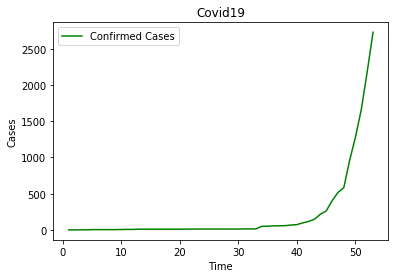

In [340]:
plot_totals(US_totals)

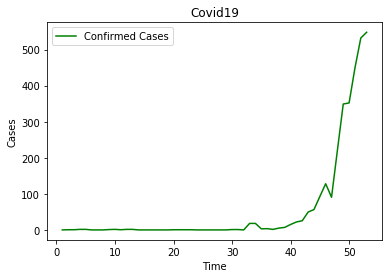

In [341]:
plot_totals(np.gradient(US_totals))

In [342]:
peak_US_index = np.argmax(np.gradient(US_totals))
print(f'Peak index {peak_US_index}')
print(f'Confirmed cases {US_totals[peak_US_index]}')

Peak index 52
Confirmed cases 2727


In [629]:
US_first_case_index = np.min(np.nonzero(US_totals))
print(f'Date of first case {US.columns[4+first_case_index]}')
print(f'Date of peak {US.columns[peak_US_index]}')
US_start_date = parse_date(US.columns[4+first_case_index])
US_peak_date = parse_date(US.columns[peak_US_index])

print(f'Duration in days {US_peak_date - US_start_date}')
print(f'Duration since first case {datetime.datetime.now() - US_start_date}')

Date of first case 1/24/20
Date of peak 3/10/20
Duration in days 46 days, 0:00:00
Duration since first case 54 days, 22:50:15.900883


# Italy

In [70]:
Italy

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20
16,NaN,Italy,43.0,12.0,0,0,0,0,0,0,...,3858,4636,5883,7375,9172,10149,12462,12462,17660,21157


In [71]:
italy_cases = Italy.iloc[:,4:]

In [150]:
italy_totals = italy_cases.values[0]

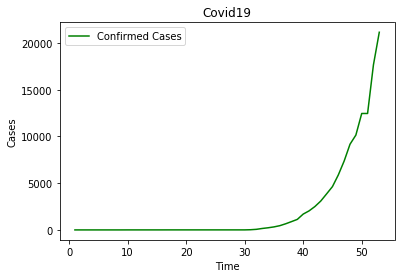

In [151]:
plot_totals(italy_totals)

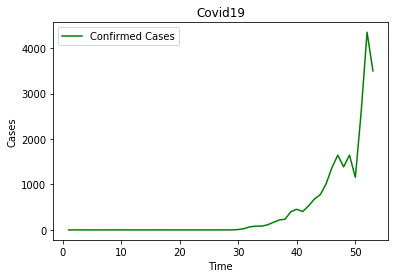

In [153]:
plot_totals(np.gradient(italy_totals))

In [631]:
peak_italy_index = np.argmax(np.gradient(italy_totals))
print(f'Peak index {peak_italy_index}')
print(f'Confirmed cases {italy_totals[peak_italy_index]}')

Peak index 51
Confirmed cases 17660


In [634]:
italy_first_case_index = np.min(np.nonzero(italy_totals))
italy_start_date = parse_date(Italy.columns[4+first_case_index])
italy_peak_date = parse_date(Italy.columns[4+peak_italy_index])
print(f'Date of first case {italy_start_date}')
print(f'Date of peak {italy_peak_date}')

print(f'Duration until peak {italy_peak_date - italy_start_date}')
print(f'Duration since first case {datetime.datetime.now() - italy_start_date}')

Date of first case 2020-01-24 00:00:00
Date of peak 2020-03-13 00:00:00
Duration until peak 49 days, 0:00:00
Duration since first case 54 days, 22:53:03.982380


# France

In [74]:
France

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20
159,France,France,46.2276,2.2137,0,0,2,3,3,3,...,377,653,949,1126,1209,1784,2281,2281,3661,4469
200,St Martin,France,18.0708,-63.0501,0,0,0,0,0,0,...,0,0,0,0,2,2,2,2,2,2
207,Saint Barthelemy,France,17.9000,-62.8333,0,0,0,0,0,0,...,3,3,3,3,1,1,1,1,1,1
408,French Polynesia,France,-17.6797,149.4068,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,3
421,Fench Guiana,France,4.0000,-53.0000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5


In [154]:
french_cases = France.iloc[:,4:]

In [155]:
french_total = french_cases.sum(axis=0).values

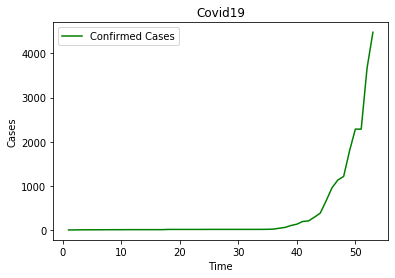

In [156]:
plot_totals(french_total)

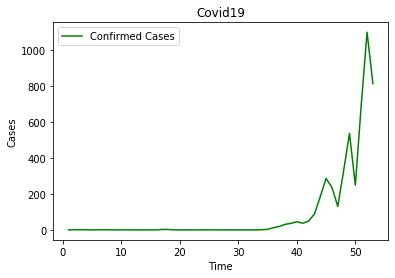

In [158]:
plot_totals(np.gradient(french_total))

In [249]:
peak_france_index = np.argmax(np.gradient(french_total))
print(f'Peak index {peak_france_index}')
print(f'Confirmed cases {french_total[peak_france_index]}')

Peak index 51
Confirmed cases 3667


In [635]:
first_case_index = np.min(np.nonzero(french_total))
france_start_date = parse_date(France.columns[4+first_case_index])
france_peak_date = parse_date(France.columns[4+peak_france_index])
print(f'Start index {first_case_index}')
print(f'Peak index {peak_france_index}')
print(f'Date of first case {france_start_date}')
print(f'Date of peak {france_peak_date}')

print(f'Duration in days {france_peak_date - france_start_date}')
print(f'Duration since first case {datetime.datetime.now() - italy_start_date}')

Start index 2
Peak index 51
Date of first case 2020-01-24 00:00:00
Date of peak 2020-03-13 00:00:00
Duration in days 49 days, 0:00:00
Duration since first case 54 days, 22:53:52.033327


# Spain

In [82]:
Spain

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20
18,NaN,Spain,40.0,-4.0,0,0,0,0,0,0,...,259,400,500,673,1073,1695,2277,2277,5232,6391


In [160]:
spain_cases = Spain.iloc[:,4:]

In [161]:
spain_totals = spain_cases.values[0]

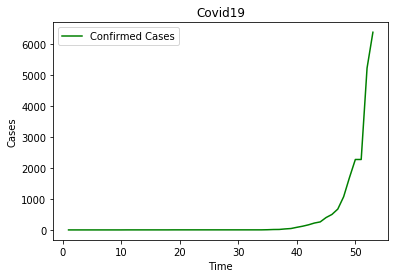

In [162]:
plot_totals(spain_totals)

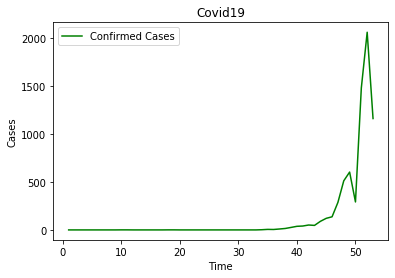

In [163]:
plot_totals(np.gradient(spain_totals))

#### Peak spain

In [636]:
peak_spain_index = np.argmax(np.gradient(spain_totals))
print(f'Peak index {peak_spain_index}')
print(f'Confirmed cases {spain_totals[peak_spain_index]}')

Peak index 51
Confirmed cases 5232


In [638]:
first_case_index = np.min(np.nonzero(spain_totals))
spain_start_date = parse_date(Spain.columns[4+first_case_index])
spain_peak_date = parse_date(Spain.columns[4+peak_spain_index])
print(f'Date of first case {Spain.columns[4+first_case_index]}')
print(f'Date of peak {Spain.columns[4+peak_spain_index]}')\

print(f'Duration in days {spain_peak_date - spain_start_date}')
print(f'Duration since first case {datetime.datetime.now() - spain_start_date}')

Date of first case 2/1/20
Date of peak 3/13/20
Duration in days 41 days, 0:00:00
Duration since first case 46 days, 22:54:58.788225


# China

In [87]:
China

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20
156,Hubei,China,30.9756,112.2707,444,444,549,761,1058,1423,...,67466,67592,67666,67707,67743,67760,67773,67781,67786,67790
160,Guangdong,China,23.3417,113.4244,26,32,53,78,111,151,...,1351,1352,1352,1352,1352,1353,1356,1356,1356,1356
161,Henan,China,33.8820,113.6140,5,5,9,32,83,128,...,1272,1272,1272,1272,1272,1272,1273,1273,1273,1273
162,Zhejiang,China,29.1832,120.0934,10,27,43,62,104,128,...,1215,1215,1215,1215,1215,1215,1215,1215,1215,1227
163,Hunan,China,27.6104,111.7088,4,9,24,43,69,100,...,1018,1018,1018,1018,1018,1018,1018,1018,1018,1018
164,Anhui,China,31.8257,117.2264,1,9,15,39,60,70,...,990,990,990,990,990,990,990,990,990,990
165,Jiangxi,China,27.6140,115.7221,2,7,18,18,36,72,...,935,935,935,935,935,935,935,935,935,935
166,Shandong,China,36.3427,118.1498,2,6,15,27,46,75,...,758,758,758,758,758,758,760,760,760,760
168,Jiangsu,China,32.9711,119.4550,1,5,9,18,33,47,...,631,631,631,631,631,631,631,631,631,631
169,Chongqing,China,30.0572,107.8740,6,9,27,57,75,110,...,576,576,576,576,576,576,576,576,576,576


In [88]:
china_cases = China.iloc[:,4:]

In [171]:
china_cases.shape

(33, 53)

In [176]:
china_totals = china_cases.sum(axis=0).values

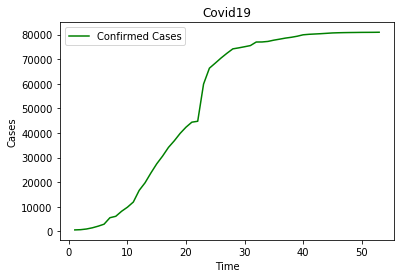

In [178]:
plot_totals(china_totals)

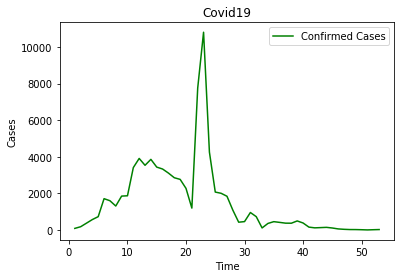

In [179]:
plot_totals(np.gradient(china_totals))

## Hubei specifically

population 58.5M

In [115]:
Hubei = China.loc[China['Province/State'].str.contains('Hubei')]

In [118]:
Hubei

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20
156,Hubei,China,30.9756,112.2707,444,444,549,761,1058,1423,...,67466,67592,67666,67707,67743,67760,67773,67781,67786,67790


In [124]:
Hubei_totals = Hubei.values[0][4:]

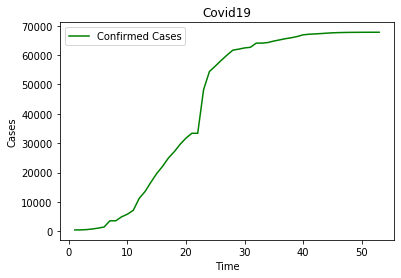

In [180]:
plot_totals(Hubei_totals)

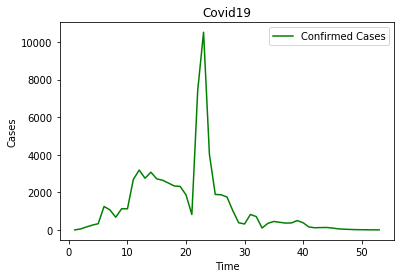

In [181]:
plot_totals(np.gradient(Hubei_totals))

# Hubei peak

In [269]:
Hubei

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20
156,Hubei,China,30.9756,112.2707,444,444,549,761,1058,1423,...,67466,67592,67666,67707,67743,67760,67773,67781,67786,67790


In [760]:
Hubei_pop = 58.5*1e+7
peak_index = np.argmax(np.gradient(Hubei_totals))
Hubei_ratio = Hubei_totals/Hubei_pop
hubei_peak_date = datetime.datetime(2020,2,13)#parse_date(Hubei.columns[peak_index+4])
hubei_start_date = datetime.datetime(2019,11,17)
print(f'Peak index {peak_index}')
print(f'confirmed: {Hubei_totals[peak_index]}')
print(f'Total Hubei pop 58.5M')
print(f'confirmed: {Hubei_ratio[peak_index]}')
print(f'Peak Date {hubei_peak_date}')
print(f'Initial start Nov 17')
print(f'Number of days {(hubei_peak_date-hubei_start_date).days}')
print(f'Duration since first case {(datetime.datetime.now() - hubei_start_date).days}')



Peak index 22
confirmed: 48206
Total Hubei pop 58.5M
confirmed: 8.24034188034188e-05
Peak Date 2020-02-13 00:00:00
Initial start Nov 17
Number of days 88
Duration since first case 123


# Korea

## Pop 51.47M

## Seoul 9.77M

In [207]:
def plot_comprehensive(data,labels,colors):
    epochs = range(1,len(data[0])+1)
    for i,label in enumerate(labels):
        plt.plot(epochs,data[i],colors[i],label=label)
    plt.title('Covid19')
    plt.xlabel('Days')
    plt.ylabel('Cases')
    plt.legend()
    plt.show()

In [241]:
Seoul_pop = 9.77*1e+7

In [298]:
korea_df.tail()

,date,time,test,negative,confirmed,released,deceased
52,2020-03-12,0,234998,209402,7869,333,66
53,2020-03-13,0,248647,222728,7979,510,67
54,2020-03-14,0,261335,235615,8086,714,72
55,2020-03-15,0,268212,243778,8126,834,75
56,2020-03-16,0,274504,251297,8236,1137,75


In [515]:
tests = korea_df['test'].values
negative = korea_df['negative'].values
confirmed = korea_df['confirmed'].values
released = korea_df['released'].values
deceased = korea_df['deceased'].values
headers = korea_df.columns[2:]
korea_data = [tests,negative,confirmed,released,deceased]
colors = ['b','g','r','c','m','b']

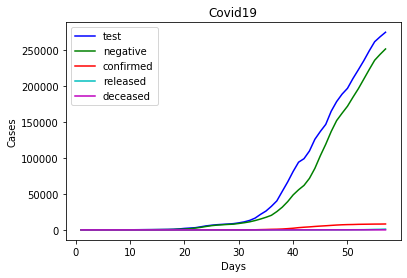

In [221]:
plot_comprehensive(korea_data,headers,colors)

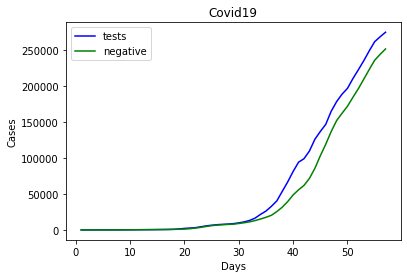

In [214]:
plot_comprehensive([tests,negative],['tests','negative'],['b','g'])

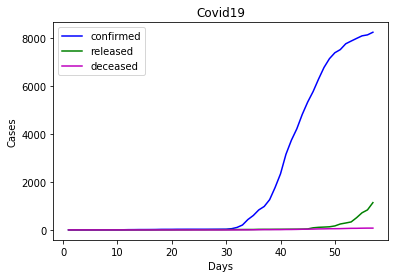

In [215]:
plot_comprehensive([confirmed,released,deceased],['confirmed','released','deceased'],['b','g','m'])

# Derivatives

In [211]:
tests_derivative = np.gradient(tests)
negative_derivative = np.gradient(negative)
confirmed_derivative = np.gradient(confirmed)
released_derivative = np.gradient(released)
deceased_derivative = np.gradient(deceased)
korea_derivatives = [tests_derivative,negative_derivative,confirmed_derivative,released_derivative,deceased_derivative]


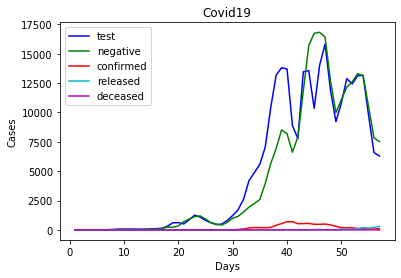

In [212]:
plot_comprehensive(korea_derivatives,headers,colors)

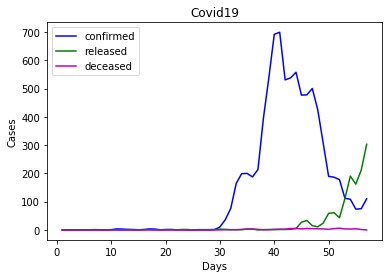

In [217]:
plot_comprehensive([confirmed_derivative,released_derivative,deceased_derivative],['confirmed','released','deceased'],['b','g','m'])


# Ratios with population

In [243]:
ratios = [d/Seoul_pop for d in korea_data]
ratio_derivatives = [np.gradient(d) for d in ratios]

# When did korea reach its peak

In [293]:
peak_index = np.argmax(confirmed_derivative)
print(f'Peak index {peak_index}')
print(f'tests: {tests[peak_index]}')
print(f'negative: {negative[peak_index]}')
print(f'confirmed: {confirmed[peak_index]}')
print(f'released: {released[peak_index]}')
print(f'deceased: {deceased[peak_index]}')
print(f'Total Seoul pop 9.77M')
print(f'tests: {ratios[0][peak_index]}')
print(f'negative: {ratios[1][peak_index]}')
print(f'confirmed: {ratios[2][peak_index]}')
print(f'released: {ratios[3][peak_index]}')
print(f'deceased: {ratios[4][peak_index]}')

Peak index 40
tests: 94055
negative: 55723
confirmed: 3150
released: 28
deceased: 17
Total Seoul pop 9.77M
tests: 0.0009626919140225179
negative: 0.0005703480040941658
confirmed: 3.224155578300921e-05
released: 2.8659160696008186e-07
deceased: 1.7400204708290685e-07


In [754]:
print(f'Korea first case {korea_df["date"][0]}')
print(f'Korea Peak date {korea_df["date"][peak_index]}')
korea_peak_date = datetime.date(2020,2,29)
korea_start_date = datetime.date(2020,1,20)
print(f'Days elapsed from start of transmission to peak {korea_peak_date - korea_start_date}')

Korea first case 2020-01-20
Korea Peak date 2020-02-29
Days elapsed from start of transmission to peak 40 days, 0:00:00


In [414]:
confirmed

array([   1,    1,    1,    1,    2,    2,    3,    4,    4,    4,    6,
         11,   12,   15,   15,   16,   18,   23,   24,   24,   27,   27,
         28,   28,   28,   28,   28,   29,   30,   31,   51,  104,  204,
        433,  602,  833,  977, 1261, 1766, 2337, 3150, 3736, 4212, 4812,
       5328, 5766, 6284, 6767, 7134, 7382, 7513, 7755, 7869, 7979, 8086,
       8126, 8236])

In [434]:
len(confirmed)
day_5s = confirmed[::5]
[print(f'day {i*5},infected {pop}') for i,pop in enumerate(day_5s)]
day_5s_dir = confirmed_derivative[::5]
[print(f'day {i*5},infected {pop}') for i,pop in enumerate(day_5s_dir)]

day 0,infected 1
day 5,infected 2
day 10,infected 6
day 15,infected 16
day 20,infected 27
day 25,infected 28
day 30,infected 51
day 35,infected 833
day 40,infected 3150
day 45,infected 5766
day 50,infected 7513
day 55,infected 8126
day 0,infected 0.0
day 5,infected 0.5
day 10,infected 3.5
day 15,infected 1.5
day 20,infected 1.5
day 25,infected 0.0
day 30,infected 36.5
day 35,infected 187.5
day 40,infected 699.5
day 45,infected 478.0
day 50,infected 186.5
day 55,infected 75.0


[None, None, None, None, None, None, None, None, None, None, None, None]

In [581]:
generator = gen_infections(2,2.5,5)
print(f'Infected population 1, Day 0')
for i in range(1,13):
    print(f'Infected population {next(generator)}, Day {i*5}')

Infected population 1, Day 0
Infected population 7.0, Day 5
Infected population 19.5, Day 10
Infected population 50.75, Day 15
Infected population 128.875, Day 20
Infected population 324.1875, Day 25
Infected population 812.46875, Day 30
Infected population 2033.171875, Day 35
Infected population 5084.9296875, Day 40
Infected population 12714.32421875, Day 45
Infected population 31787.810546875, Day 50
Infected population 79471.5263671875, Day 55
Infected population 198680.81591796875, Day 60


In [484]:
mu = 5000
sigma = 1
x1 = 1
x2 = 10000

# calculate the z-transform
z1 = ( x1 - mu ) / sigma
z2 = ( x2 - mu ) / sigma
print(z1,z2)

x = np.arange(z1, z2, 10) # range of x in spec
x_all = np.arange(0, 80, 1) # entire range of x, both in and out of spec
# mean = 0, stddev = 1, since Z-transform was calculated
y = norm.pdf(x,0,10000)
y2 = norm.pdf(x_all,0,10000)

print(x_all)
print(y)
# points = np.random.normal(mu,sigma,100)


-4999.0 5000.0
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79]
[3.52082929e-05 3.52258803e-05 3.52434412e-05 3.52609757e-05
 3.52784836e-05 3.52959649e-05 3.53134195e-05 3.53308475e-05
 3.53482486e-05 3.53656230e-05 3.53829706e-05 3.54002913e-05
 3.54175850e-05 3.54348517e-05 3.54520914e-05 3.54693040e-05
 3.54864895e-05 3.55036479e-05 3.55207790e-05 3.55378828e-05
 3.55549593e-05 3.55720084e-05 3.55890301e-05 3.56060244e-05
 3.56229911e-05 3.56399303e-05 3.56568419e-05 3.56737259e-05
 3.56905821e-05 3.57074106e-05 3.57242113e-05 3.57409842e-05
 3.57577292e-05 3.57744463e-05 3.57911354e-05 3.58077965e-05
 3.58244295e-05 3.58410343e-05 3.58576111e-05 3.58741596e-05
 3.58906799e-05 3.59071718e-05 3.59236354e-05 3.59400707e-05
 3.59564775e-05 3.59728558e-05 3.59892056e-05 3.60055268e-05
 3.60218

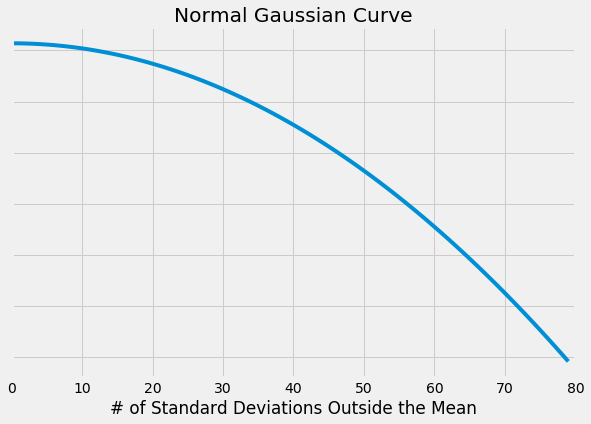

In [487]:
# build the plot
fig, ax = plt.subplots(figsize=(9,6))
plt.style.use('fivethirtyeight')
ax.plot(x_all,y2)

# ax.fill_between(x,y,0, alpha=0.3, color='b')
# ax.fill_between(x_all,y2,0, alpha=0.1)
ax.set_xlim([0,80])
ax.set_xlabel('# of Standard Deviations Outside the Mean')
ax.set_yticklabels([])
ax.set_title('Normal Gaussian Curve')

plt.savefig('normal_curve.png', dpi=72, bbox_inches='tight')
plt.show()

# Predictions

using time series to predict the next number of cases

## Inputs

More informative

- current number of confirmed cases
- number of tests so far

Less informative

- current number of confirmed cases

## Extract and shape the data

In [561]:
unique_dates = italy_df['Date'].unique()
# print('unique_dates',unique_dates)
tests_preformed = []
tests_positive = []
for date in unique_dates:
    rows = italy_df[italy_df['Date'] == date]
    tests_preformed.append(rows['TestsPerformed'].sum())
    tests_positive.append(rows['TotalPositiveCases'].sum())

In [565]:
korea_ml = np.stack([tests,confirmed])
italy_ml = np.stack([tests_preformed,tests_positive])
# china_ml =
usa_ml =  np.stack([USA_1df['posNeg'].values,USA_1df['positive'].values])

In [566]:
print(korea_ml.shape,italy_ml.shape,usa_ml.shape)

(2, 57) (2, 23) (2, 14)


# Networks

In [573]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable as V
from torch import optim
from torch.distributions import Categorical

In [578]:
class Baseline(nn.Module):
    def __init__(self,seed,nS,nA,hidden_dims=(64,64),activation=F.leaky_relu):
        super(Baseline,self).__init__()
        self.activation = activation
        self.nS = nS
        self.nA = nA
        self.seed = torch.manual_seed(seed)
        self.fc1 = nn.Linear(nS,hidden_dims[0])
        self.fc2 = nn.Linear(hidden_dims[0],hidden_dims[1])
        self.fc3 = nn.Linear(hidden_dims[1],nA)
        
    def forward(self,state,mask):
        x = state
        if not isinstance(state,torch.Tensor):
            x = torch.tensor(x,dtype=torch.float32)
            x = x.unsqueeze(0)
        x = self.activation(self.fc1(x))
        x = self.activation(self.fc2(x))
        return self.fc3(x)
    
class Convnet(nn.Module):
    def __init__(self,seed,nS,nA,hidden_dims=(64,64),activation=F.leaky_relu):
        super(Baseline,self).__init__()
        self.activation = activation
        self.nS = nS
        self.nA = nA
        self.seed = torch.manual_seed(seed)
        self.fc1 = nn.Conv2d(nS,hidden_dims[0])
        self.fc2 = nn.Linear(hidden_dims[0],hidden_dims[1])
        self.fc3 = nn.Linear(hidden_dims[1],nA)
        
    def forward(self,state,mask):
        x = state
        if not isinstance(state,torch.Tensor):
            x = torch.tensor(x,dtype=torch.float32)
            x = x.unsqueeze(0)
        x = self.activation(self.fc1(x))
        x = self.activation(self.fc2(x))
        return self.fc3(x)

class LSTM():
    def __init__(self,seed,nS,nA,hidden_dims=(64,64),activation=F.leaky_relu):
        super(Baseline,self).__init__()
        self.activation = activation
        self.nS = nS
        self.nA = nA
        self.seed = torch.manual_seed(seed)
        self.lstm = nn.LSTM(nS,hidden_dims[0])
        
    def forward(self,state,mask):
        x = state
        if not isinstance(state,torch.Tensor):
            x = torch.tensor(x,dtype=torch.float32)
            x = x.unsqueeze(0)
        x,h = self.lstm(x)
        return x



# Train

In [ ]:
def train(params):
    for 

In [579]:
nS = 2
nA = 1
seed = 1078
net = Baseline(seed,nS,nA)